In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
land_use = pd.read_csv("../data_full/land_use_fixed.csv")
land_use

FileNotFoundError: [Errno 2] No such file or directory: '../data_full/land_use_fixed.csv'

In [3]:
taz_geometry = gpd.read_file('../data_cleanup/gis/USA_TAZs_incl_CUBE_NX_N.shp').set_index("CUBE_N") #TAZ included in the LDT model
taz_geometry = taz_geometry[taz_geometry["MODEL_AREA"] == 1]
taz_geometry

DriverError: ../data_cleanup/gis/USA_TAZs_incl_CUBE_NX_N.shp: No such file or directory

In [91]:
display(land_use["Total_Employment"].nlargest(10))
largest_emp = land_use["Total_Employment"].nlargest(10).index

5072    1.131428e+07
5023    6.715955e+06
5097    5.874963e+06
5110    5.874963e+06
5060    5.134587e+06
5075    4.593787e+06
5024    3.344355e+06
5031    3.306496e+06
5082    2.781250e+06
5076    2.504708e+06
Name: Total_Employment, dtype: float64

<AxesSubplot:>

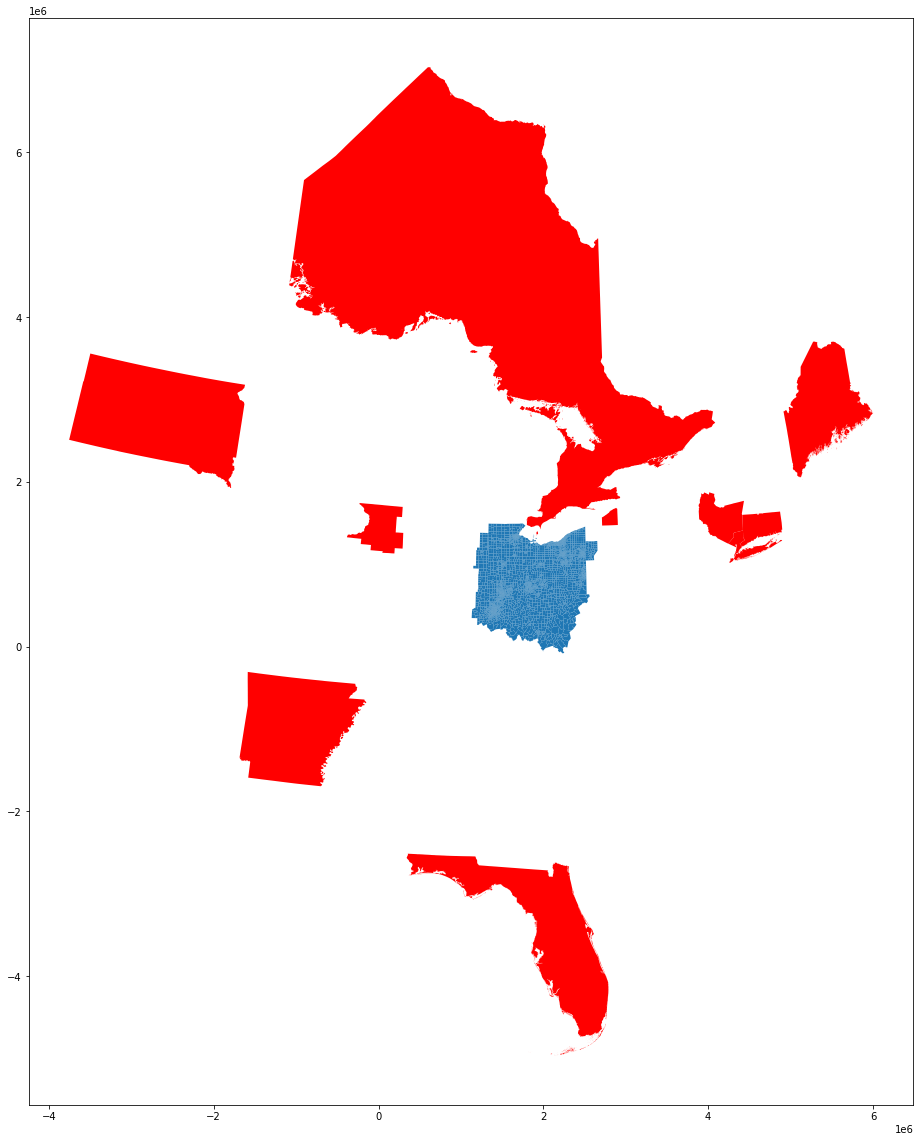

In [89]:
# most largest employment ones are states
fig, ax = plt.subplots(figsize=(20, 20))
taz_geometry.plot(ax=ax)
gpd.read_file('../data_cleanup/gis/USA_TAZs_incl_CUBE_NX_N.shp').set_index("CUBE_N").loc[largest_emp].plot(ax=ax, color="red")

In [47]:
accessibility = pd.read_csv("outputs/final_accessibility.csv").set_index("zone_id")
accessibility

,auPkTotal,auPkRetail,auPkTotalAdj,auPkRetailAdj,auOpTotal,auOpRetail,auPkTotalMean,auPkTotalStd,auNormPkTotal
zone_id,,,,,,,,,
1,7.189312e+00,4.961081e+00,7.189058,4.960858,7.207009e+00,4.970106e+00,10.144507,1.368587,-2.159489
2,7.028146e+00,4.903016e+00,7.026839,4.901984,7.033760e+00,4.905795e+00,10.144507,1.368587,-2.278019
3,7.865410e+00,5.567636e+00,7.865125,5.567367,7.878541e+00,5.575980e+00,10.144507,1.368587,-1.665500
4,6.864996e+00,4.606197e+00,6.859594,4.601342,6.861664e+00,4.599933e+00,10.144507,1.368587,-2.400221
5,6.898877e+00,4.634339e+00,6.897973,4.633501,6.901845e+00,4.636060e+00,10.144507,1.368587,-2.372179
...,...,...,...,...,...,...,...,...,...
5112,4.048555e+00,2.219077e+00,0.000000,0.000000,4.048555e+00,2.219077e+00,10.144507,1.368587,0.000000
5113,1.028277e-08,1.579213e-09,0.000000,0.000000,1.028277e-08,1.579213e-09,10.144507,1.368587,0.000000
5114,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,10.144507,1.368587,0.000000


In [84]:
largest_taz = accessibility.nlargest(100, "auPkTotal").index

<AxesSubplot:>

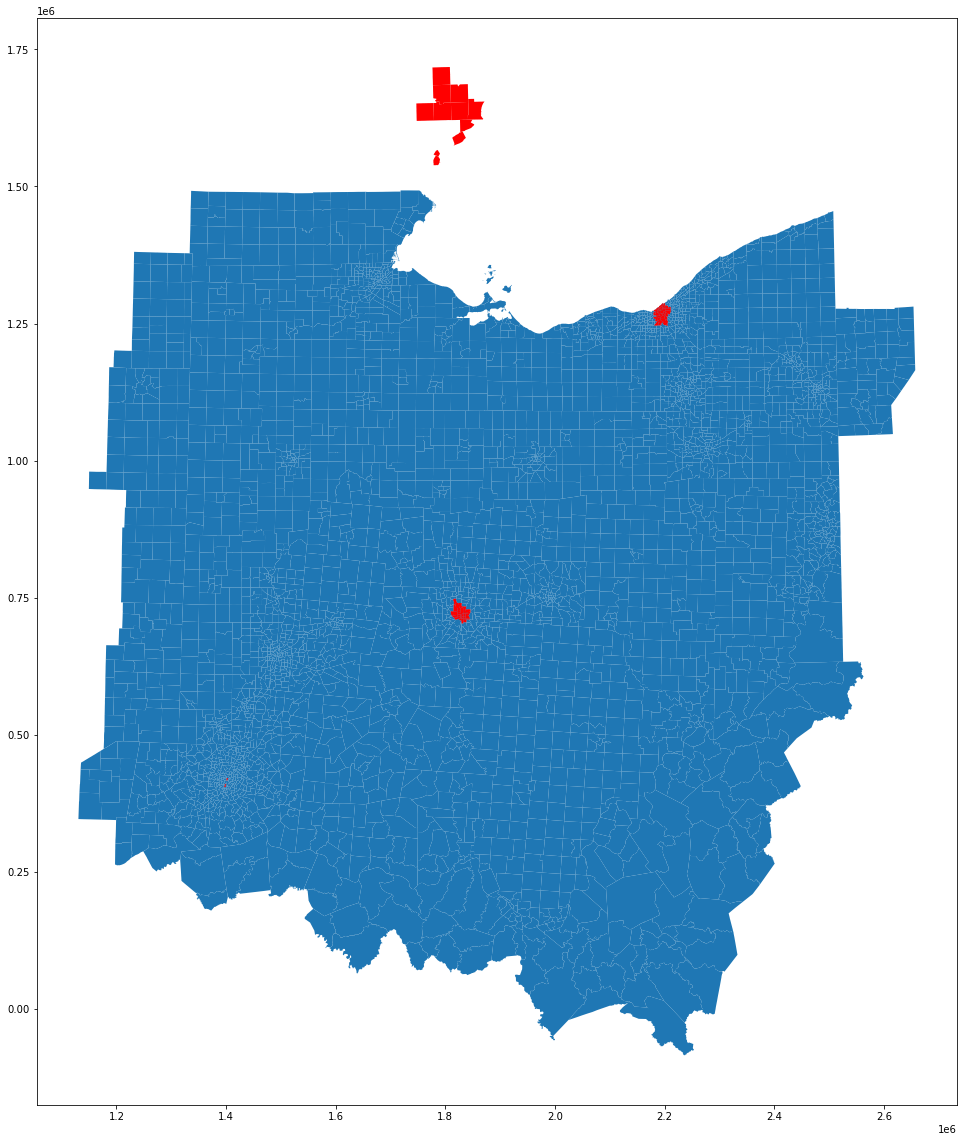

In [86]:
# overall largest accessibilities are in urban areas
fig, ax = plt.subplots(figsize=(20, 20))
taz_geometry.plot(ax=ax)
gpd.read_file('../data_cleanup/gis/USA_TAZs_incl_CUBE_NX_N.shp').set_index("CUBE_N").loc[largest_taz].plot(ax=ax, color="red")

In [68]:
# only taz/accessibility within model
model_accessibility = accessibility[accessibility.index.isin(taz_geometry.index)]
model_accessibility

,auPkTotal,auPkRetail,auPkTotalAdj,auPkRetailAdj,auOpTotal,auOpRetail,auPkTotalMean,auPkTotalStd,auNormPkTotal
zone_id,,,,,,,,,
1,7.189312,4.961081,7.189058,4.960858,7.207009,4.970106,10.144507,1.368587,-2.159489
2,7.028146,4.903016,7.026839,4.901984,7.033760,4.905795,10.144507,1.368587,-2.278019
3,7.865410,5.567636,7.865125,5.567367,7.878541,5.575980,10.144507,1.368587,-1.665500
4,6.864996,4.606197,6.859594,4.601342,6.861664,4.599933,10.144507,1.368587,-2.400221
5,6.898877,4.634339,6.897973,4.633501,6.901845,4.636060,10.144507,1.368587,-2.372179
...,...,...,...,...,...,...,...,...,...
4998,7.655467,5.775624,7.655238,5.775461,7.641472,5.763950,10.144507,1.368587,-1.818860
4999,9.117634,7.238557,9.117432,7.238414,9.108399,7.230286,10.144507,1.368587,-0.750464
5000,8.822410,6.679810,8.822134,6.679550,8.813733,6.670886,10.144507,1.368587,-0.966232


<AxesSubplot:>

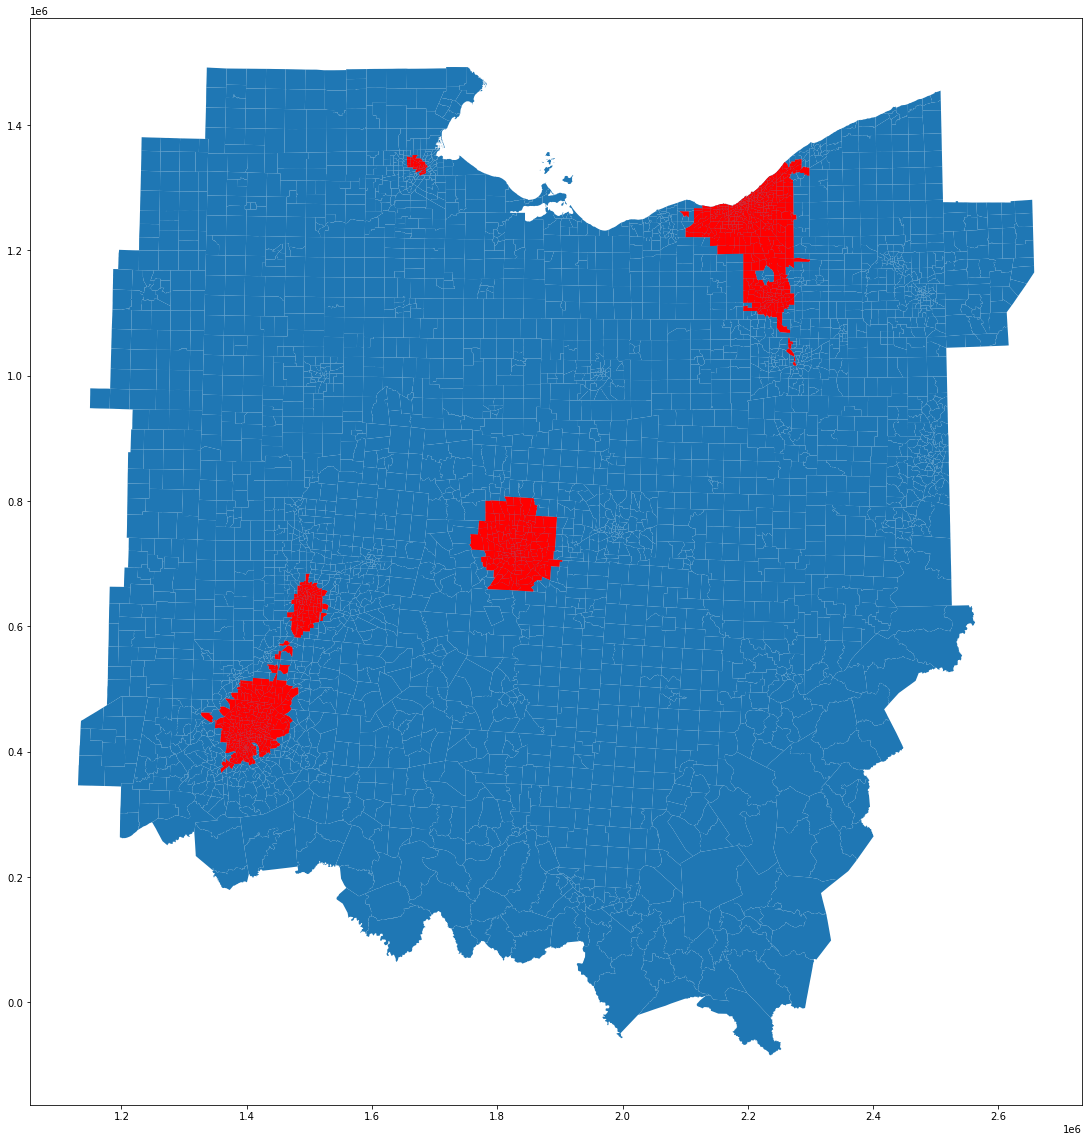

In [76]:
# largest model accessibilities are in urban areas
fig, ax = plt.subplots(figsize=(20, 20))
taz_geometry.plot(ax=ax)
taz_geometry.loc[model_accessibility.nlargest(1000, "auNormPkTotal").index].plot(ax=ax, color="red")

<AxesSubplot:>

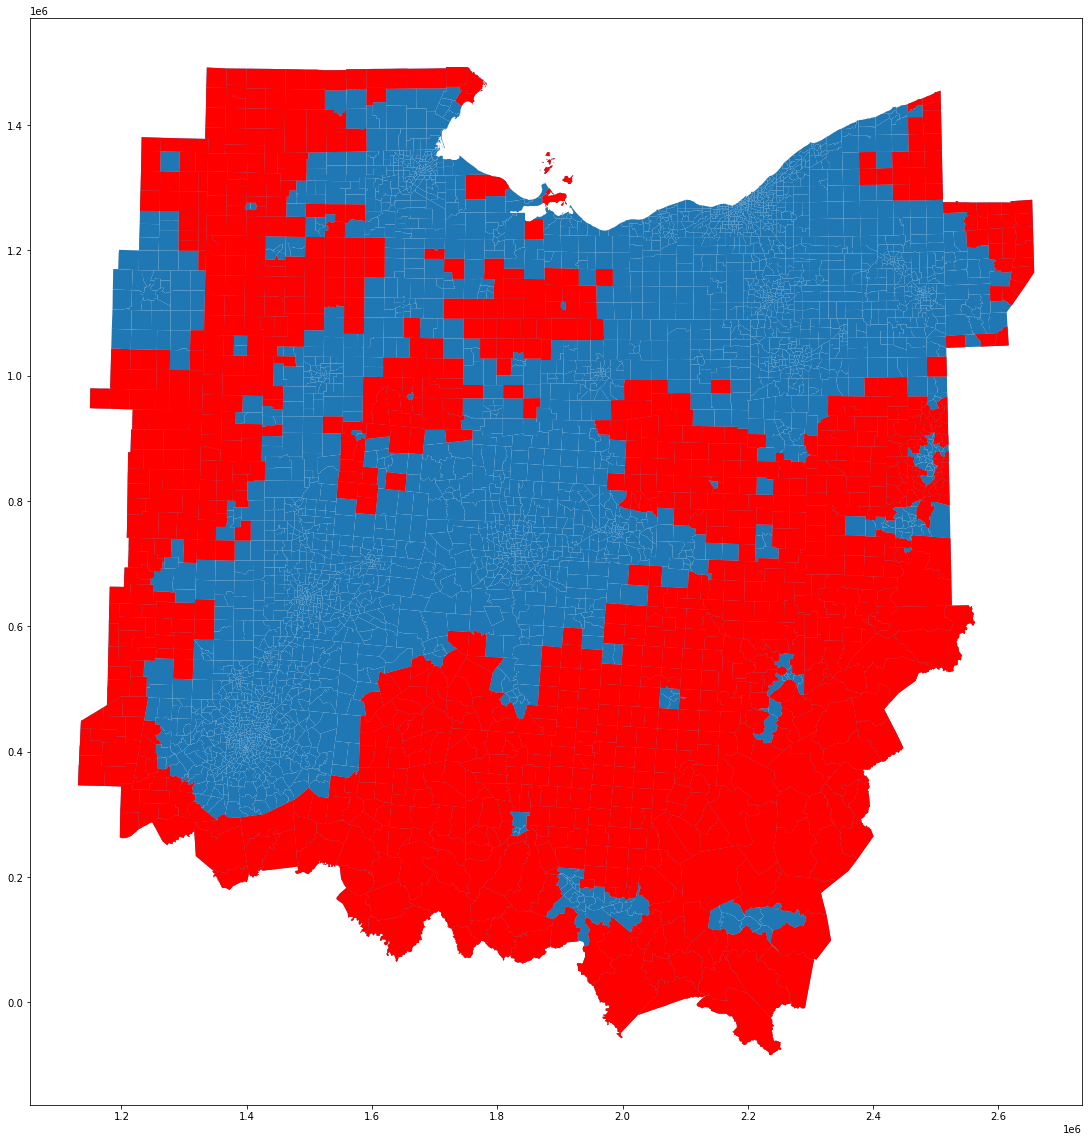

In [52]:
# smallest accessibilities are in rural areas
fig, ax = plt.subplots(figsize=(20, 20))
taz_geometry.plot(ax=ax)
taz_geometry.loc[model_accessibility.nsmallest(1000, "auNormPkTotal").index].plot(ax=ax, color="red")

In [58]:
# accessibility is normalized in the model area (outside model area, is 0/has no effect)
model_accessibility["auNormPkTotal"].describe()

count    4.248000e+03
mean    -1.391647e-15
std      1.000118e+00
min     -3.715309e+00
25%     -7.366411e-01
50%      9.106351e-02
75%      8.327913e-01
max      1.682287e+00
Name: auNormPkTotal, dtype: float64

In [23]:
model_accessibility["auPkRetail"].describe()

count    4248.000000
mean        7.727872
std         1.233527
min         3.033153
25%         6.808782
50%         7.875317
75%         8.788856
max         9.606226
Name: auPkRetail, dtype: float64

<AxesSubplot:ylabel='Density'>

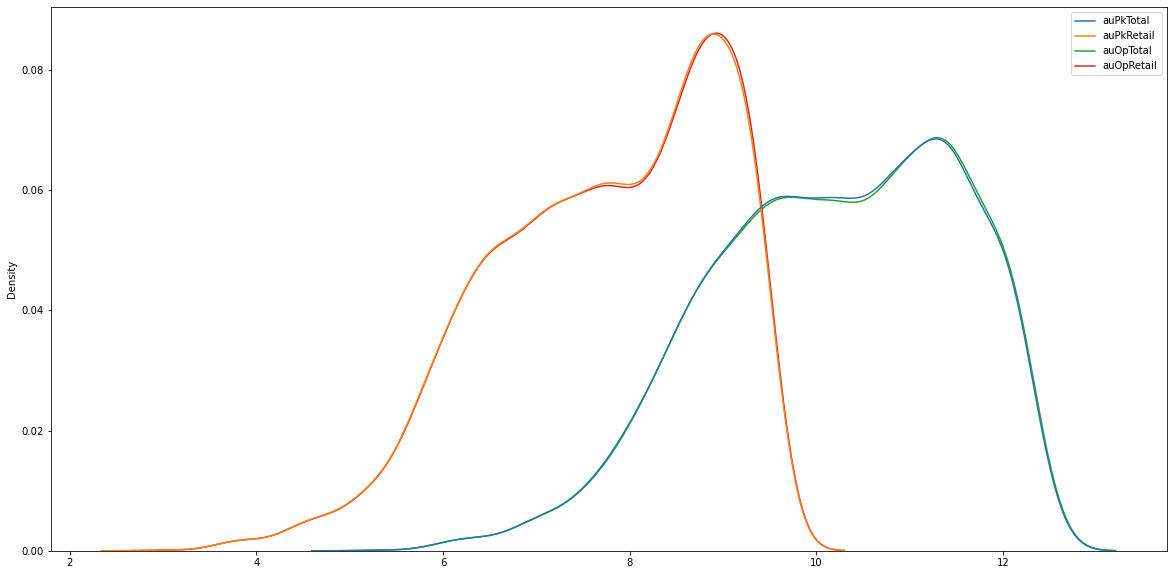

In [22]:
# OP ~ PK, retail accessibility is generally less than total (as expected)
plt.figure(figsize=(20, 10))
sns.kdeplot(data=model_accessibility)